# Import The Necessary Libraries

In [1]:
# import 'pandas' 
import pandas as pd 

# import 'numpy' 
import numpy as np

# import subpackage of matplotlib
import matplotlib.pyplot as plt

# import 'seaborn'
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# import 'stats' package from scipy library
from scipy import stats

# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

# function to perform post-hoc test
import statsmodels.stats.multicomp as mc


import scikit_posthocs

import statistics
import statsmodels.api as sm
from statsmodels.stats import weightstats as stests
import scipy
from scipy.stats import shapiro
import random
import pitch 
import turtle

## Reading The Data

In [2]:
fifa_data=pd.read_csv('fifadata1.csv')
pd.set_option('display.max_columns',None)
fifa_data


,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,League
0,0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000,565000,Left,5.0,4.0,4.0,Medium/ Medium,RF,10.0,"Jul 1, 2004",Not on loan,2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,LALIGA SANTANDER
1,1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000,405000,Right,5.0,4.0,5.0,High/ Low,ST,7.0,"Jul 10, 2018",Not on loan,2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,SERIE A TIM
2,2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000,290000,Right,5.0,5.0,5.0,High/ Medium,LW,10.0,"Aug 3, 2017",Not on loan,2022,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,LIGUE 1 CONFORAMA
3,3,De Gea,27,Spain,91,93,Manchester United,72000000,260000,Right,4.0,3.0,1.0,Medium/ Medium,GK,1.0,"Jul 1, 2011",Not on loan,2020,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,PREMIER LEAGUE
4,4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000,355000,Right,4.0,5.0,4.0,High/ High,RCM,7.0,"Aug 30, 2015",Not on loan,2023,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,PREMIER LEAGUE
5,5,E. Hazard,27,Belgium,91,91,Chelsea,93000000,340000,Right,4.0,4.0,4.0,High/ Medium,LF,10.0,"Jul 1, 2012",Not on loan,2020,5'8,163lbs,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M,PREMIER LEAGUE
6,6,L. Modrić,32,Croatia,91,91,Real Madrid,67000000,420000,Right,4.0,4.0,4.0,High/ High,RCM,10.0,"Aug 1, 2012",Not on loan,2020,5'8,146lbs,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M,LALIGA SANTANDER
7,7,L. Suárez,31,Uruguay,91,91,FC Barcelona,80000000,455000,Right,5.0,4.0,3.0,High/ Medium,RS,9.0,"Jul 11, 2014",Not on loan,2021,6'0,190lbs,77.0,93.0,77.0,82.0,88.0,87.0,86.0,84.0,64.0,90.0,86.0,75.0,82.0,92.0,83.0,86.0,69.0,90.0,83.0,85.0,87.0,41.0,92.0,84.0,85.0,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M,LALIGA SANTANDER
8,8,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000,380000,Right,4.0,3.0,3.0,High/ Medium,RCB,15.0,"Aug 1, 2005",Not on loan,2020,6'0,181lbs,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,76.0,75.0,78.0,85.0,66.0,79.0,93.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M,LALIGA SANTANDER
9,9,J. Oblak,25,Slovenia,90,93,Atlético Madrid,68000000,94000,Right,3.0,3.0,1.0,Medium/ Medium,GK,1.0,"Jul 16, 2014",Not on loan,2021,6'2,192lbs,13.0,11.0,15.0,29.0,13.0,12.0,13.0,14.0,26.0,16.0,43.0,60.0,67.0,86.0,49.0,22.0,76.0,41.0,78.0,12.0,34.0,19.0,11.0,70.0,11.0,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M,LALIGA SANTANDER


In [3]:
fifa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18147 entries, 0 to 18146
Data columns (total 57 columns):
Unnamed: 0                  18147 non-null int64
Name                        18147 non-null object
Age                         18147 non-null int64
Nationality                 18147 non-null object
Overall                     18147 non-null int64
Potential                   18147 non-null int64
Club                        18147 non-null object
Value                       18147 non-null int64
Wage                        18147 non-null int64
Preferred Foot              18147 non-null object
International Reputation    18147 non-null float64
Weak Foot                   18147 non-null float64
Skill Moves                 18147 non-null float64
Work Rate                   18147 non-null object
Position                    18147 non-null object
Jersey Number               18147 non-null float64
Joined                      16654 non-null object
Loaned From                 18147 non-null 

### The data has 18147 instances with 57 attributes. 6 integer type, 38 float type and 13 object type

In [4]:
#Checking For Null Values
fifa_data.isnull().sum()

Unnamed: 0                     0
Name                           0
Age                            0
Nationality                    0
Overall                        0
Potential                      0
Club                           0
Value                          0
Wage                           0
Preferred Foot                 0
International Reputation       0
Weak Foot                      0
Skill Moves                    0
Work Rate                      0
Position                       0
Jersey Number                  0
Joined                      1493
Loaned From                    0
Contract Valid Until           0
Height                         0
Weight                         0
Crossing                       0
Finishing                      0
HeadingAccuracy                0
ShortPassing                   0
Volleys                        0
Dribbling                      0
Curve                          0
FKAccuracy                     0
LongPassing                    0
BallContro

### We have one column with null values. We remove it because it is the joining date and has no impact in our analysis. We remove few other columns as well

In [5]:
fifa_data=fifa_data.drop(columns=['Joined','Loaned From','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve',
                       'FKAccuracy','LongPassing','Agility','BallControl','Acceleration','SprintSpeed','Reactions','Balance','ShotPower',
                       'Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties',
                       'Composure','Marking','StandingTackle','SlidingTackle','GKDiving','GKHandling','GKKicking','GKPositioning'
                       ,'GKReflexes','Jersey Number'],axis=1)
fifa_data

,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Contract Valid Until,Height,Weight,Release Clause,League
0,0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000,565000,Left,5.0,4.0,4.0,Medium/ Medium,RF,2021,5'7,159lbs,€226.5M,LALIGA SANTANDER
1,1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000,405000,Right,5.0,4.0,5.0,High/ Low,ST,2022,6'2,183lbs,€127.1M,SERIE A TIM
2,2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000,290000,Right,5.0,5.0,5.0,High/ Medium,LW,2022,5'9,150lbs,€228.1M,LIGUE 1 CONFORAMA
3,3,De Gea,27,Spain,91,93,Manchester United,72000000,260000,Right,4.0,3.0,1.0,Medium/ Medium,GK,2020,6'4,168lbs,€138.6M,PREMIER LEAGUE
4,4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000,355000,Right,4.0,5.0,4.0,High/ High,RCM,2023,5'11,154lbs,€196.4M,PREMIER LEAGUE
5,5,E. Hazard,27,Belgium,91,91,Chelsea,93000000,340000,Right,4.0,4.0,4.0,High/ Medium,LF,2020,5'8,163lbs,€172.1M,PREMIER LEAGUE
6,6,L. Modrić,32,Croatia,91,91,Real Madrid,67000000,420000,Right,4.0,4.0,4.0,High/ High,RCM,2020,5'8,146lbs,€137.4M,LALIGA SANTANDER
7,7,L. Suárez,31,Uruguay,91,91,FC Barcelona,80000000,455000,Right,5.0,4.0,3.0,High/ Medium,RS,2021,6'0,190lbs,€164M,LALIGA SANTANDER
8,8,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000,380000,Right,4.0,3.0,3.0,High/ Medium,RCB,2020,6'0,181lbs,€104.6M,LALIGA SANTANDER
9,9,J. Oblak,25,Slovenia,90,93,Atlético Madrid,68000000,94000,Right,3.0,3.0,1.0,Medium/ Medium,GK,2021,6'2,192lbs,€144.5M,LALIGA SANTANDER


In [6]:
fifa_data.describe()

,Unnamed: 0,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves
count,18147.000000,18147.000000,18147.000000,18147.000000,1.814700e+04,18147.000000,18147.000000,18147.000000,18147.000000
mean,9089.239599,25.121122,66.253926,71.324076,2.417729e+06,9759.023530,1.113297,2.947154,2.361492
std,5257.923360,4.669796,6.913320,6.132286,5.602826e+06,22030.250349,0.394150,0.660498,0.756274
min,0.000000,16.000000,46.000000,48.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000
25%,4536.500000,21.000000,62.000000,67.000000,3.000000e+05,1000.000000,1.000000,3.000000,2.000000
50%,9076.000000,25.000000,66.000000,71.000000,6.750000e+05,3000.000000,1.000000,3.000000,2.000000
75%,13662.500000,28.000000,71.000000,75.000000,2.000000e+06,9000.000000,1.000000,3.000000,3.000000
max,18206.000000,45.000000,94.000000,95.000000,1.185000e+08,565000.000000,5.000000,5.000000,5.000000


### The data seems to hold good for all parameters
### 75% of the players have an overall rating under 71 with an international reputaion of 1. It is very hard for them to get into the national team. 
### The wages are higly skewed, meaning very few players are playing in the top tier of football.

In [7]:
skew = fifa_data.skew()
print(skew)

Unnamed: 0                  0.005242
Age                         0.391228
Overall                     0.062948
Potential                   0.265475
Value                       7.059966
Wage                        7.895185
International Reputation    4.058856
Weak Foot                   0.138619
Skill Moves                 0.149512
dtype: float64


### Skew of age and potential is less
### Overall is almost normal
### Value,Wages and International Reputation are highly skewed

In [8]:
kurt=fifa_data.kurt()
print(kurt)

Unnamed: 0                   -1.199686
Age                          -0.460774
Overall                       0.095135
Potential                     0.039079
Value                        76.643961
Wage                        100.431929
International Reputation     18.945774
Weak Foot                     0.658226
Skill Moves                  -0.088176
dtype: float64


### Value, Wage and International reputation are Leptokurtic

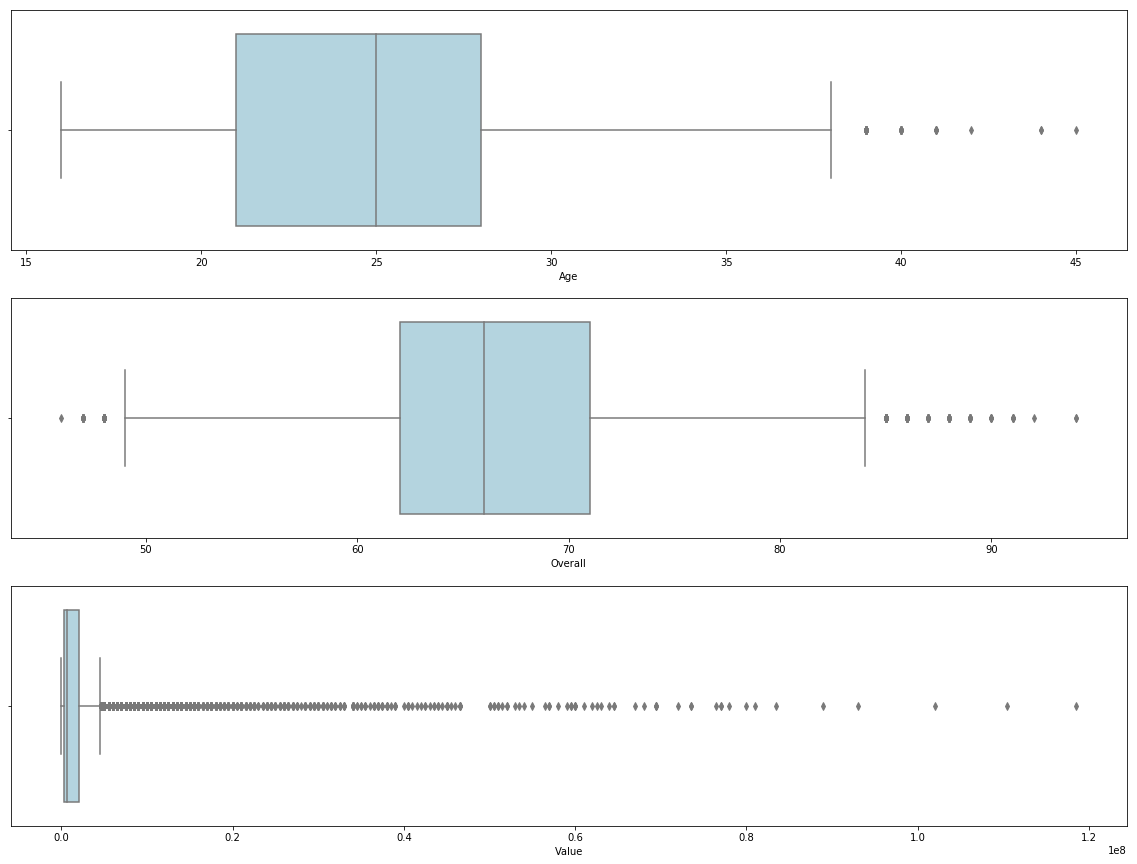

In [9]:
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= fifa_data.Age, color='lightblue')

plt.subplot(3,1,2)
sns.boxplot(x= fifa_data.Overall, color='lightblue')

plt.subplot(3,1,3)
sns.boxplot(x= fifa_data.Value, color='lightblue')

plt.show()

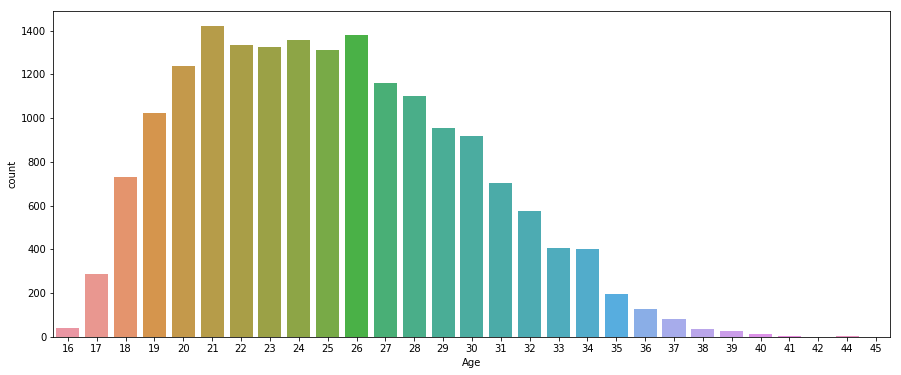

In [10]:
plt.figure(figsize= (15,6))
sns.countplot(x='Age',data=fifa_data)
plt.show()

### Players aged 21 are highest in number

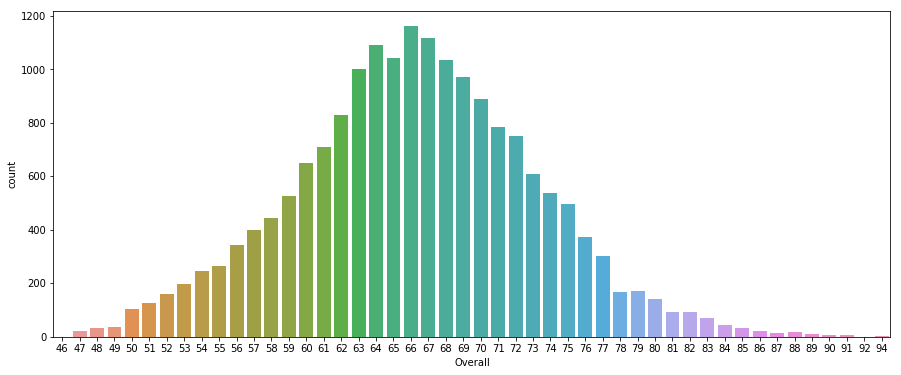

In [11]:
plt.figure(figsize= (15,6))
sns.countplot(x='Overall',data=fifa_data)
plt.show()

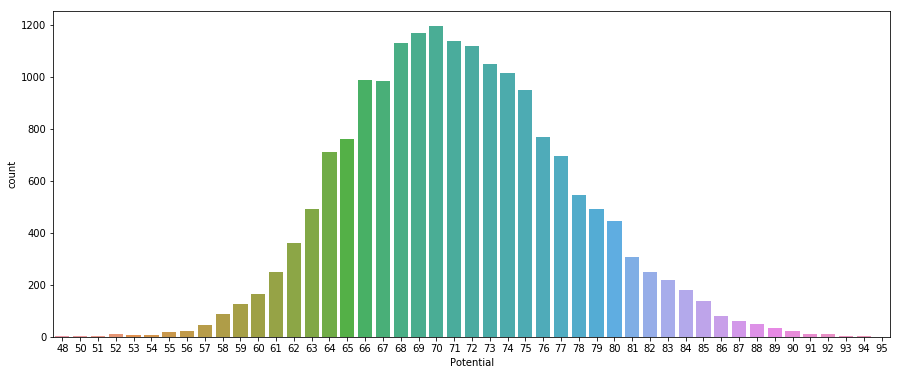

In [12]:
plt.figure(figsize= (15,6))
sns.countplot(x='Potential',data=fifa_data)
plt.show()

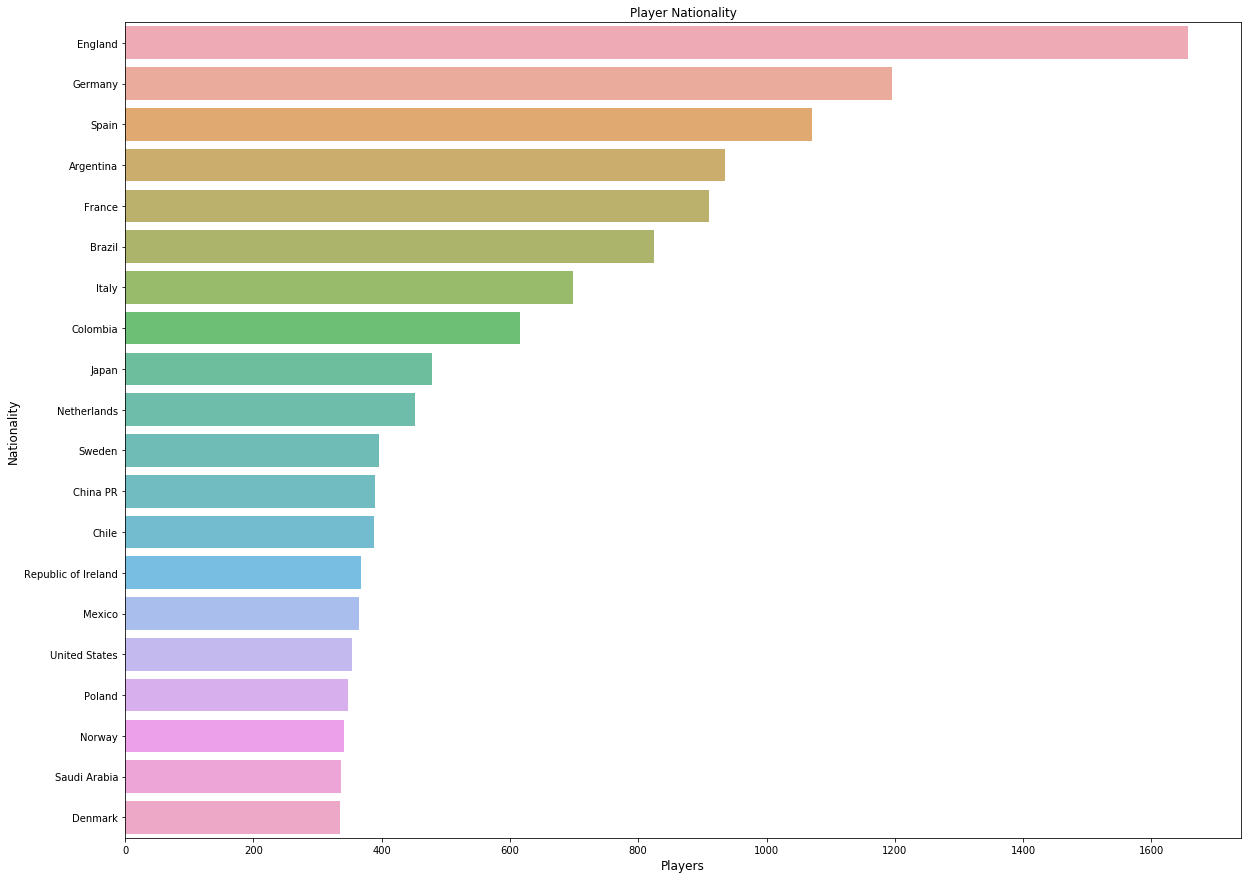

In [13]:
nation_count = fifa_data['Nationality'].value_counts()
nation_count = nation_count[0:20]
plt.figure(figsize=(20,15))
sns.barplot(nation_count.values,nation_count.index,  alpha=0.8)
plt.title('Player Nationality')
plt.ylabel('Nationality', fontsize=12)
plt.xlabel('Players', fontsize=12)
plt.show()

### England produces the highest number of Footballers followed by Germany, Spain and Argentina

Text(0.5,0,'League')

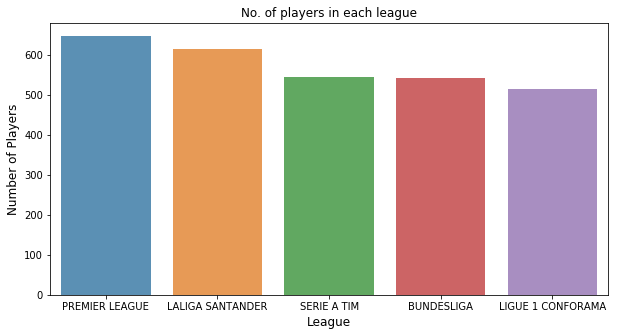

In [14]:
league_count = fifa_data['League'].value_counts()
league_count = league_count[1:6]
plt.figure(figsize=(10,5))
sns.barplot(league_count.index, league_count.values, alpha=0.8)
plt.title('No. of players in each league')
plt.ylabel('Number of Players', fontsize=12)
plt.xlabel('League', fontsize=12)

### Most of the players play in English League followed by Spain,Italy,Germany and France

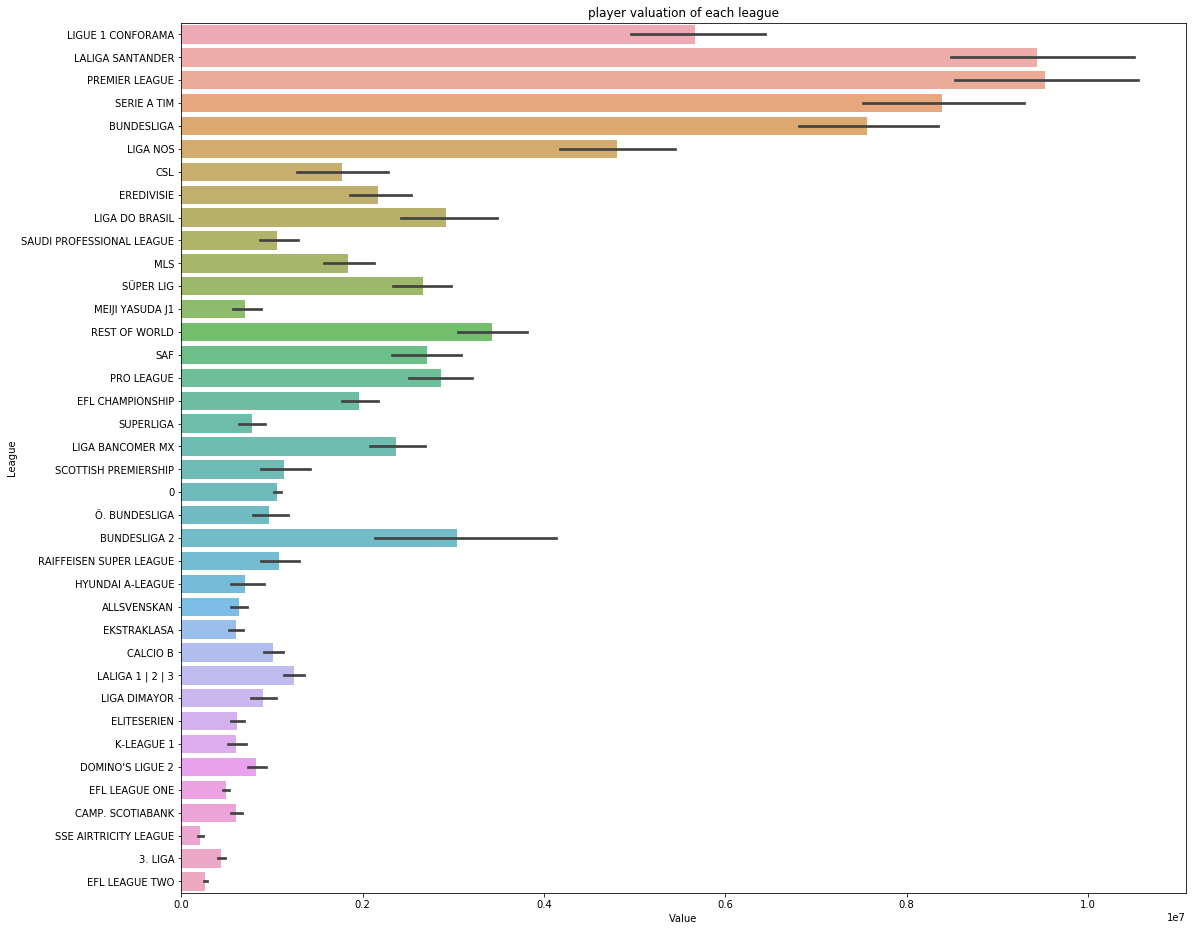

In [15]:
Val_df = fifa_data.groupby(["League"]).Value.sum().reset_index()
val_df = fifa_data.sort_values('Value', ascending=False)
f, ax = plt.subplots(figsize=(18, 16))
sns.barplot(x="Value", y="League", data=val_df,alpha=0.8)
plt.title('player valuation of each league')
plt.show()

### Most Valuable Players Play in Engalnd

In [16]:
print(fifa_data['Value'].sum())
print(52*fifa_data['Wage'].sum())

43874529950
9209044000


## The total valuation of players is 43.38 billion euro and 9.2 Billion Euros are spent on Player Wages

# Central Limit Theorm

In [17]:
series1=fifa_data.Age
series2=fifa_data.Value
series3=fifa_data.Potential


In [18]:
def central_limit_theorem(data,n_samples = 1000, sample_size = 500):
    min_value = 0 
    max_value = data.count()
    b = {}
    for i in range(n_samples):
        x = np.unique(np.random.randint(min_value, max_value, size = sample_size)) 
        b[i] = data[x].mean()  
    c = pd.DataFrame()
    c['sample'] = b.keys()  
    c['Mean'] = b.values()  
    plt.figure(figsize= (15,5))

    plt.subplot(1,2,2)
    sns.distplot(c.Mean)
    plt.title(f"Sampling Distribution. \n \u03bc = {round(c.Mean.mean(), 3)} & SE = {round(c.Mean.std(),3)}")
    plt.xlabel('data')
    plt.ylabel('freq')

    plt.subplot(1,2,1)
    sns.distplot(data)
    plt.title(f"Population Distribution. \n \u03bc = {round(data.mean(), 3)} & \u03C3 = {round(data.std(),3)}")
    plt.xlabel('data')
    plt.ylabel('freq')

    plt.show()


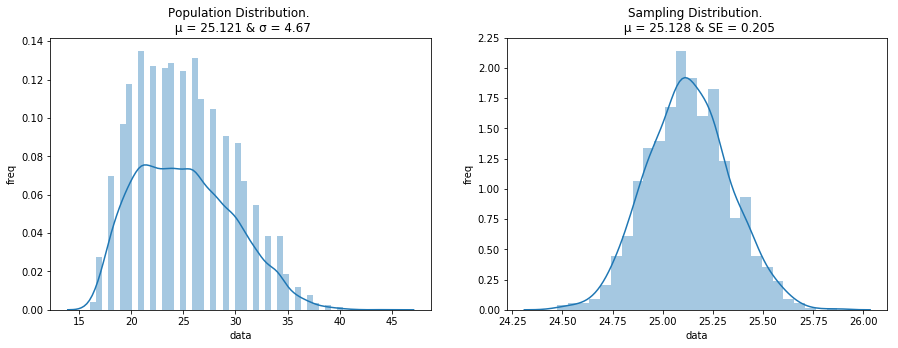

In [19]:
central_limit_theorem(series1,n_samples = 1000, sample_size = 500)

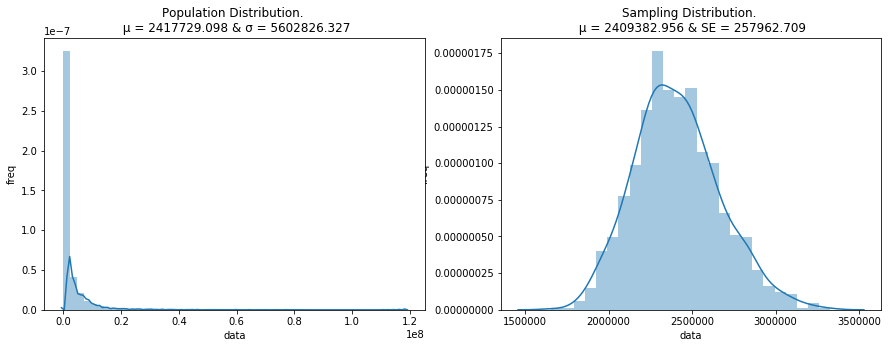

In [20]:
central_limit_theorem(series2,n_samples = 1000, sample_size = 500)

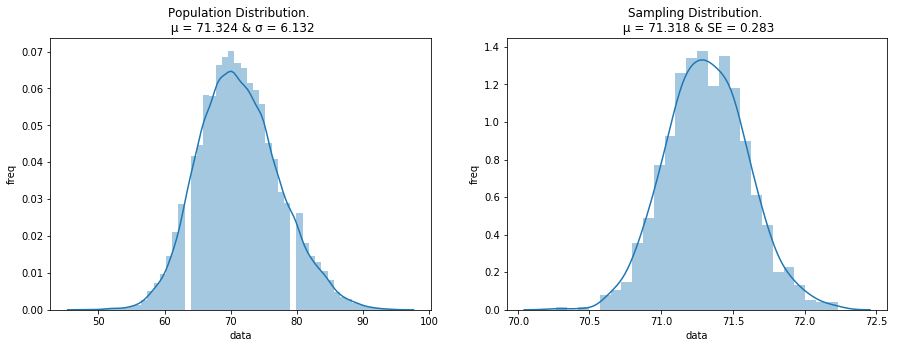

In [21]:
central_limit_theorem(series3,n_samples = 1000, sample_size = 500)

# Bi-Variate Analysis

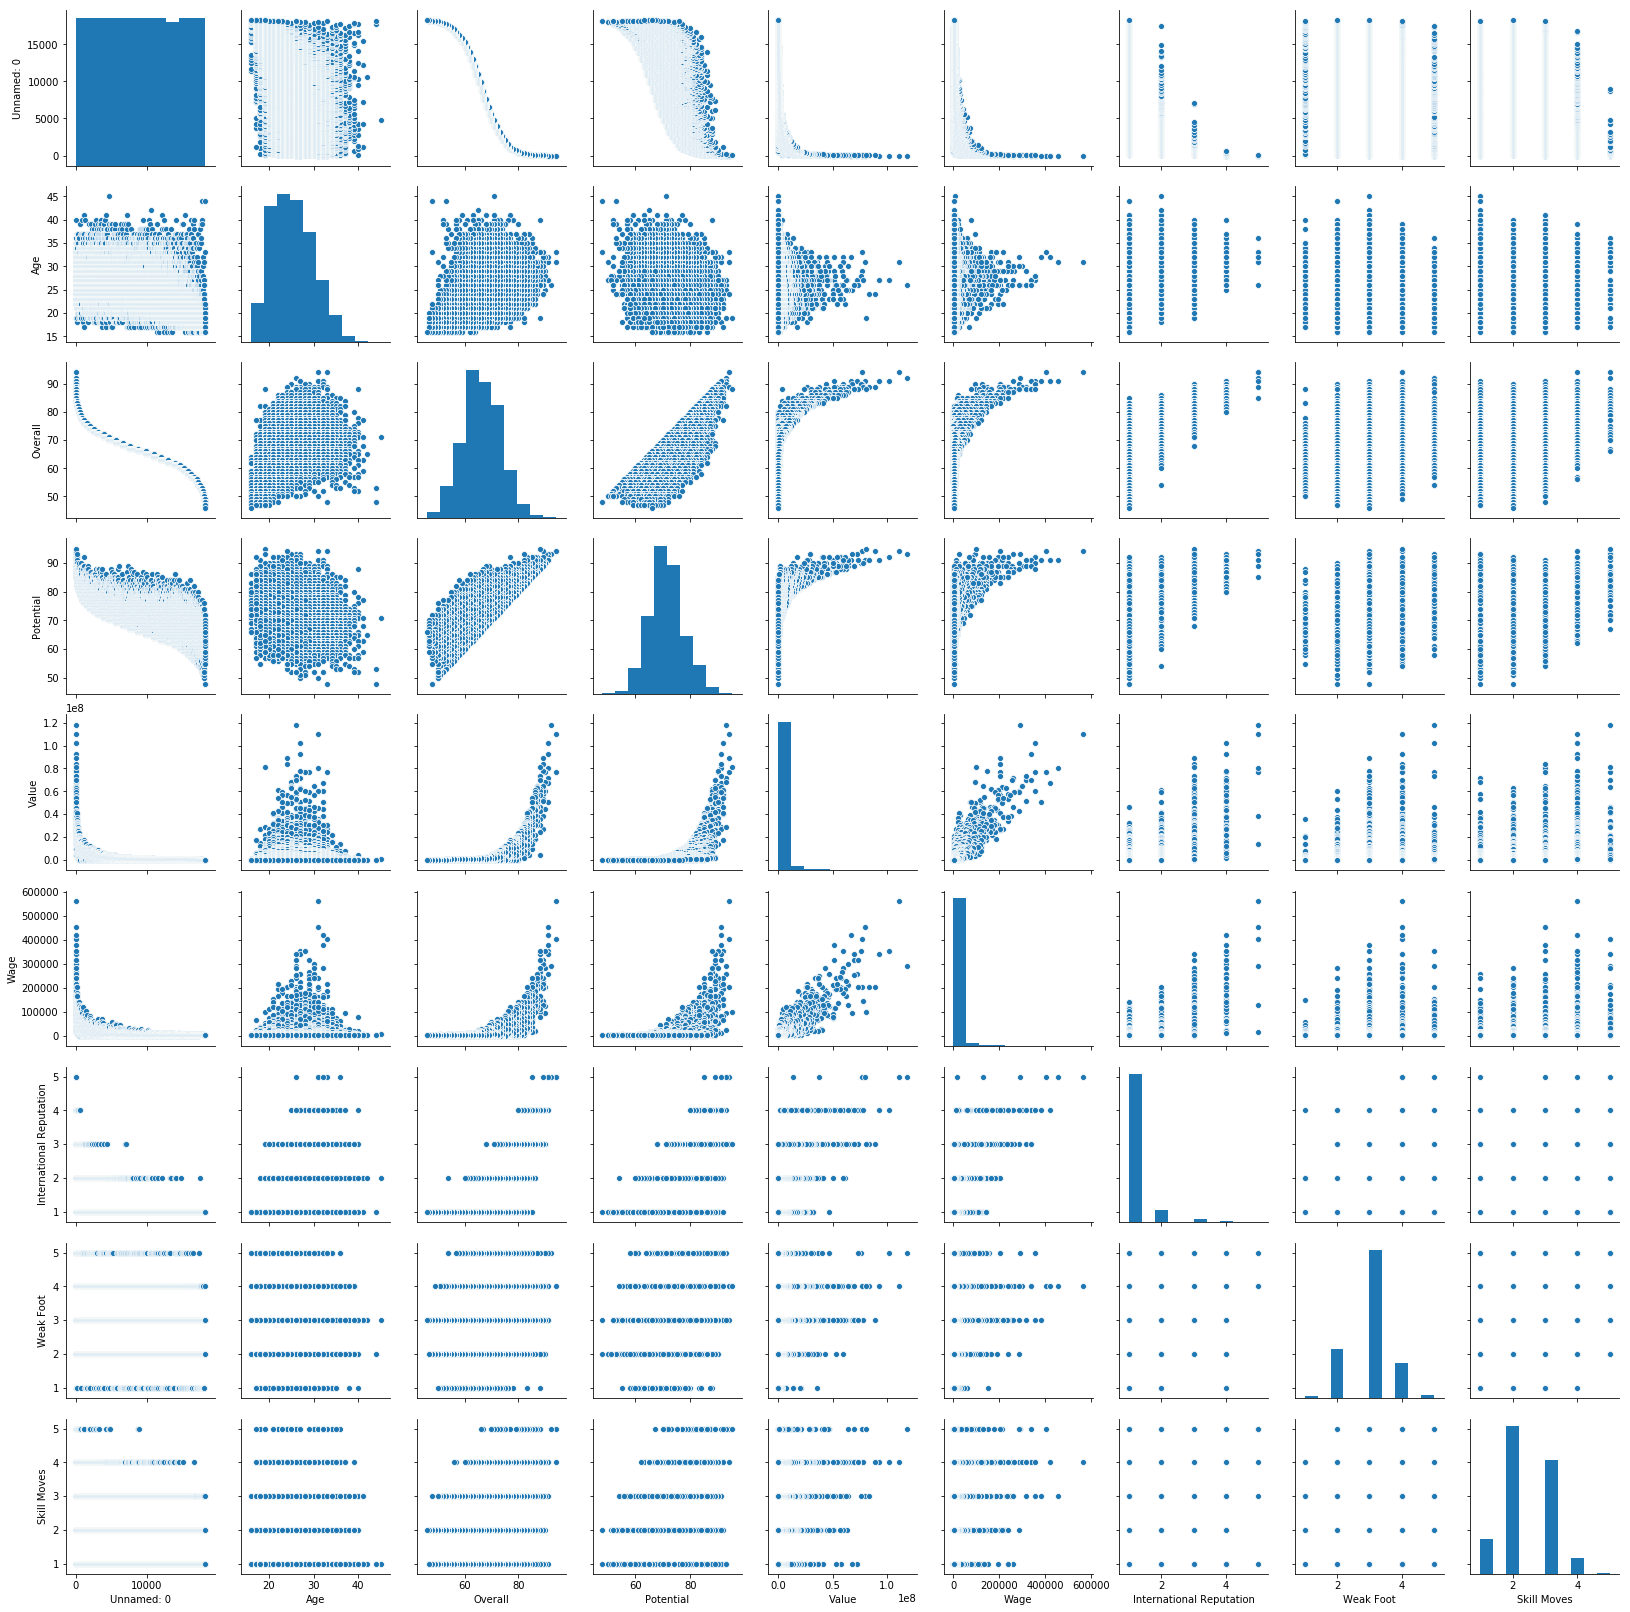

In [22]:
sns.pairplot(fifa_data)  #pairplot
plt.show()

### It is evident that higher the overall rating, higher are the wages and value of the players
### There is an interesting pattern between age, overall and potential.

## Does age decrease the potential and overall of players?

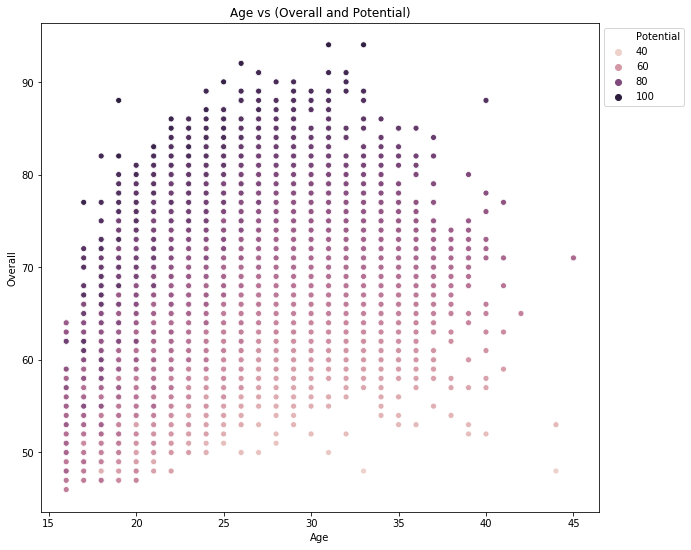

In [23]:
plt.figure(figsize=(10,9))
ax=sns.scatterplot(y='Overall',x='Age',hue='Potential',data=fifa_data,sizes=(5000,6000))
ax.set_title('Age vs (Overall and Potential)')
ax.legend(loc='upper left',bbox_to_anchor=(1, 1))
plt.show()

### By looking at the scatterplot we can conclude that the overall and potential decreases after a certain age. 

## A sports correspondent claims that the Value of most of the players in the premier league is greater than 5M Euro. Let's test this claim.

In [9]:
Ho='Value of players in the Premier League is less than or equal to 5Million'
Ha='Value of players in the Premier League is greater than 5Million'
data = fifa_data[fifa_data['League'] == 'PREMIER LEAGUE']
#Hypothesised Medain
HM=5000000
df=data.sample(n=100)
df1=df[('Value')]
diff=df1-HM
test_stat, p_value = stats.wilcoxon(x = diff)
print('Test statistic:', test_stat)
print('p-value:', p_value/2)
if p_value/2<0.05:
    print('we reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

Test statistic: 1529.0
p-value: 0.000479796452807237
we reject the null hypothesis


## The value of Premier League players is greater than 5Million Euro

## Does position of the player depend on their prefered foot?

Text(0.5,0,'Preferred Foot')

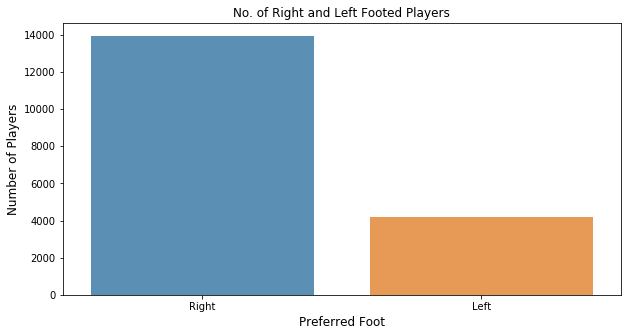

In [25]:
pref_foot_count = fifa_data['Preferred Foot'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(pref_foot_count.index, pref_foot_count.values, alpha=0.8)
plt.title('No. of Right and Left Footed Players')
plt.ylabel('Number of Players', fontsize=12)
plt.xlabel('Preferred Foot', fontsize=12)

In [26]:
Ho = "Prefered foot and Position are Independent"   # Stating the Null Hypothesis
Ha = "Prefered foot and Position are not Independent"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(fifa_data['Preferred Foot'], (fifa_data['Position']=='RF'))  

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Prefered foot and Position are Independent as the p_value (0.289) > 0.05


## Does work rate depend on the age?

In [27]:
Ho='Age has no effect on work rate'
Ha='Age has an effect on work rate'
fifa_data['Work Rate'].unique()
#There are 9 unique work rates assigned to each player
wmm = fifa_data[fifa_data['Work Rate'] == 'Medium/ Medium']['Age']
whl = fifa_data[fifa_data['Work Rate'] == 'High/ Low']['Age']
whm = fifa_data[fifa_data['Work Rate'] == 'High/ Medium']['Age']
whh = fifa_data[fifa_data['Work Rate'] == 'High/ High']['Age']
wmh = fifa_data[fifa_data['Work Rate'] == 'Medium/ High']['Age']
wml = fifa_data[fifa_data['Work Rate'] == 'Medium/ Low']['Age']
wlh = fifa_data[fifa_data['Work Rate'] == 'Low/ High']['Age']
wlm = fifa_data[fifa_data['Work Rate'] == 'Low/ Medium']['Age']
wll = fifa_data[fifa_data['Work Rate'] == 'Low/ Low']['Age']
#Testing the normalitty of age with the players
stat, p_value = stats.shapiro(fifa_data['Age'])

# print the p-value
print('p-value:', p_value)



p-value: 0.0


#### From the above result, we can see that the p-value is less than 0.05, thus we can say that the age is not normally distributed. This does not satisfy the assumption of normality for ANOVA.

In [28]:
chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df = 8), 4))

print('Critical value for the test:', chi2_val)

test_stat, p_val = stats.kruskal(wmm,whl,whm,whh,wmh,wml,wlh,wlm,wll)

print('Test statistic:', test_stat)
print('p-value:', p_val)

Critical value for the test: 15.5073
Test statistic: 464.6415117259605
p-value: 2.6922201575106963e-95


### The test statistic is greater than critical value (464.64>15.50), Hence we can reject the null hypothesis and conclude that the work rates depend on the age of players.

### A fan stats that the average of the players should be greater than 26.

In [29]:
Ho='Average age is less than or equal to 26'
Ha='Average age is greater than 26'
sigma=statistics.stdev(fifa_data['Age'])
mu=fifa_data['Age'].mean()
n=fifa_data.sample(n=50)
xbar=n['Age'].mean()
stat, p_value = stats.shapiro(n['Age'])
print('Test statistic:', stat)
print('P-Value:', p_value)
print('Sample mean',xbar)
z=(xbar-mu)/(sigma/50**0.5)
print('Zscore',z)
zcrit=stats.norm.isf(0.05)
print('Zcritical Value',zcrit)
if z>zcrit:
    print('z>zcrit we reject the null hypothesis')
else:
    print('z<zcrit we fail to reject the null hypothesis')
stats.norm.interval(0.95,loc=mu,scale=sigma)

Test statistic: 0.9686874747276306
P-Value: 0.20457106828689575
Sample mean 25.4
Zscore 0.42228086460670344
Zcritical Value 1.6448536269514729
z<zcrit we fail to reject the null hypothesis


(15.968489412898235, 34.27375448416464)

# Best Overall Team

In [30]:
fifa_data['Position'].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'], dtype=object)

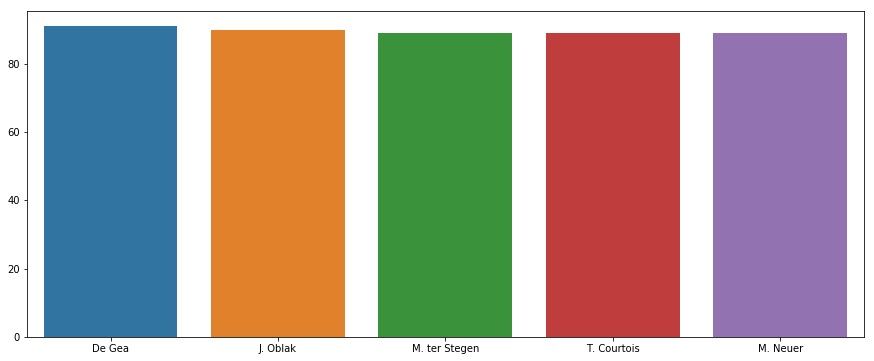

In [31]:
plt.figure(figsize= (15,6))
fifa_data['GK']=fifa_data[(fifa_data['Position'] == 'GK')]['Overall']
sd1=fifa_data.sort_values('GK',ascending=False)[:5]
x1=np.array(list(sd1['Name']))
y1=np.array(list(sd1['GK']))
sns.barplot(x1,y1)
plt.show()

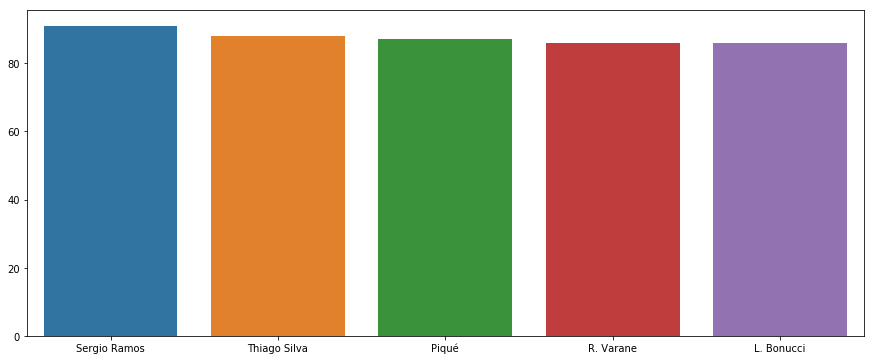

In [32]:
plt.figure(figsize= (15,6))
fifa_data['CD']=fifa_data[(fifa_data['Position'] == 'RCB')]['Overall']
sd1=fifa_data.sort_values('CD',ascending=False)[:5]
x1=np.array(list(sd1['Name']))
y1=np.array(list(sd1['CD']))
sns.barplot(x1,y1)
plt.show()

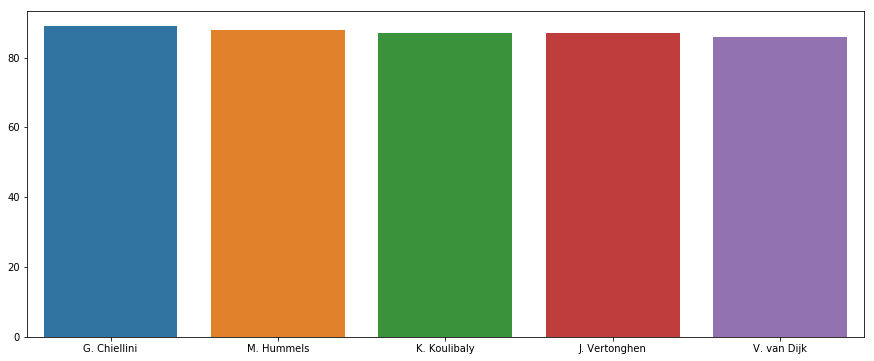

In [33]:
plt.figure(figsize= (15,6))
fifa_data['CD']=fifa_data[(fifa_data['Position'] == 'LCB')]['Overall']
sd1=fifa_data.sort_values('CD',ascending=False)[:5]
x1=np.array(list(sd1['Name']))
y1=np.array(list(sd1['CD']))
sns.barplot(x1,y1)
plt.show()

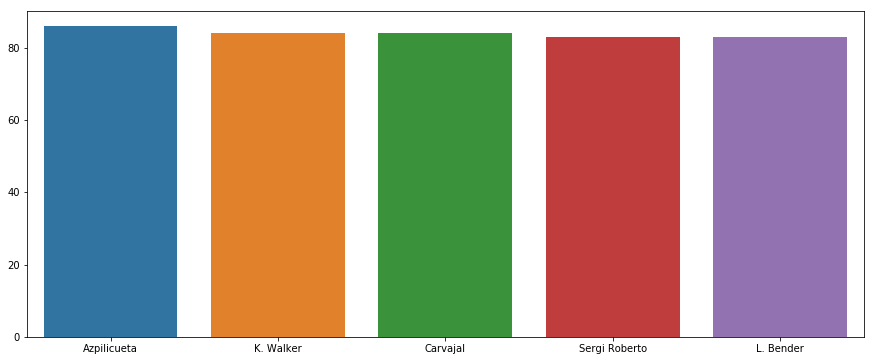

In [34]:
posi=['RB','RWB']
plt.figure(figsize= (15,6))
fifa_data['Pos']=fifa_data[(fifa_data['Position'].isin(posi))]['Overall']
sd1=fifa_data.sort_values('Pos',ascending=False)[:5]
x1=np.array(list(sd1['Name']))
y1=np.array(list(sd1['Pos']))
sns.barplot(x1,y1)
plt.show()

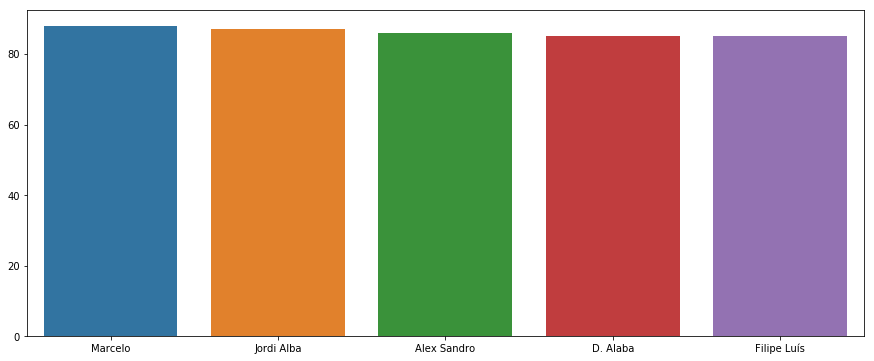

In [35]:
posi=['LB','LWB']
plt.figure(figsize= (15,6))
fifa_data['Pos']=fifa_data[(fifa_data['Position'].isin(posi))]['Overall']
sd1=fifa_data.sort_values('Pos',ascending=False)[:5]
x1=np.array(list(sd1['Name']))
y1=np.array(list(sd1['Pos']))
sns.barplot(x1,y1)
plt.show()

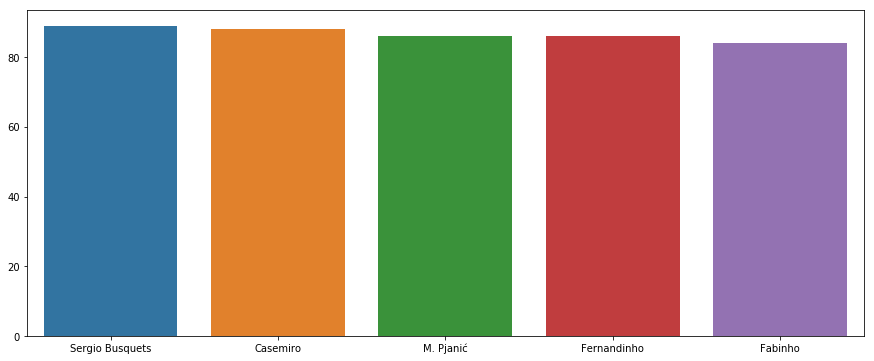

In [36]:
plt.figure(figsize= (15,6))
fifa_data['Pos']=fifa_data[(fifa_data['Position'] == 'CDM')]['Overall']
sd1=fifa_data.sort_values('Pos',ascending=False)[:5]
x1=np.array(list(sd1['Name']))
y1=np.array(list(sd1['Pos']))
sns.barplot(x1,y1)
plt.show()

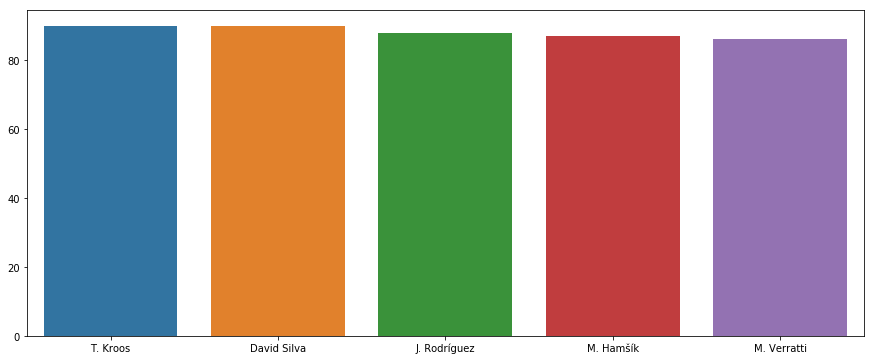

In [37]:
posi=['LCM','LAM']
plt.figure(figsize= (15,6))
fifa_data['Pos']=fifa_data[(fifa_data['Position'].isin(posi))]['Overall']
sd1=fifa_data.sort_values('Pos',ascending=False)[:5]
x1=np.array(list(sd1['Name']))
y1=np.array(list(sd1['Pos']))
sns.barplot(x1,y1)
plt.show()

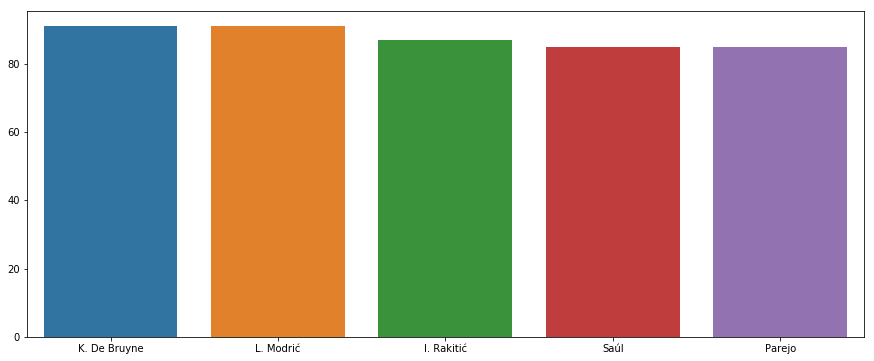

In [38]:
posi=['RCM','RAM']
plt.figure(figsize= (15,6))
fifa_data['Pos']=fifa_data[(fifa_data['Position'].isin(posi))]['Overall']
sd1=fifa_data.sort_values('Pos',ascending=False)[:5]
x1=np.array(list(sd1['Name']))
y1=np.array(list(sd1['Pos']))
sns.barplot(x1,y1)
plt.show()

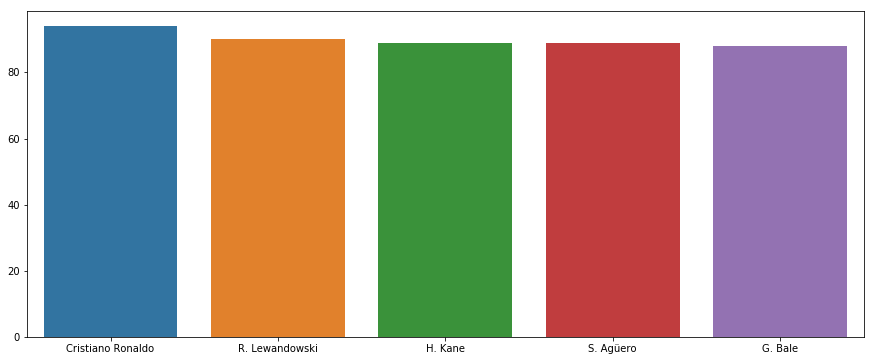

In [39]:
posi=['ST','CF']
plt.figure(figsize= (15,6))
fifa_data['Pos']=fifa_data[(fifa_data['Position'].isin(posi))]['Overall']
sd1=fifa_data.sort_values('Pos',ascending=False)[:5]
x1=np.array(list(sd1['Name']))
y1=np.array(list(sd1['Pos']))
sns.barplot(x1,y1)
plt.show()

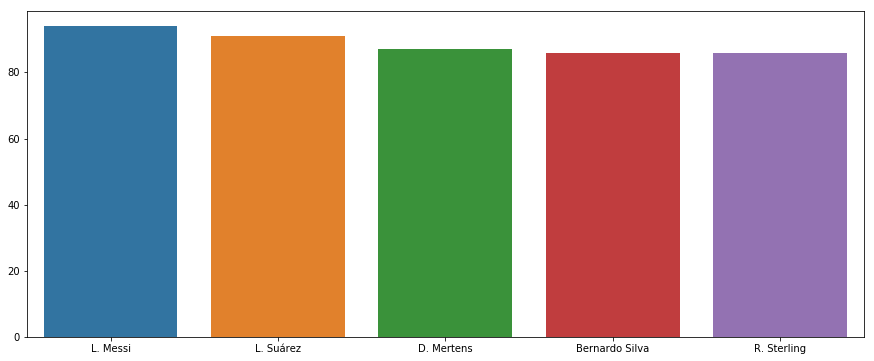

In [40]:
posi=['RW','RS','RF']
plt.figure(figsize= (15,6))
fifa_data['Pos']=fifa_data[(fifa_data['Position'].isin(posi))]['Overall']
sd1=fifa_data.sort_values('Pos',ascending=False)[:5]
x1=np.array(list(sd1['Name']))
y1=np.array(list(sd1['Pos']))
sns.barplot(x1,y1)
plt.show()

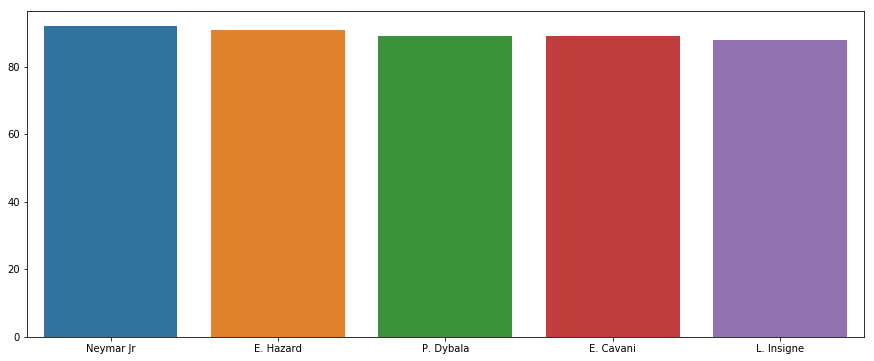

In [41]:
posi=['LW','LF','LS']
plt.figure(figsize= (15,6))
fifa_data['Pos']=fifa_data[(fifa_data['Position'].isin(posi))]['Overall']
sd1=fifa_data.sort_values('Pos',ascending=False)[:5]
x1=np.array(list(sd1['Name']))
y1=np.array(list(sd1['Pos']))
sns.barplot(x1,y1)
plt.show()

In [42]:
#A Procedure to draw a player at the given position
import pitch
import turtle
def drawPlayer(color,x,y,label):
  screen = turtle.Screen()
  screen.tracer(0)
  myPen = turtle.Turtle()
  myPen.hideturtle()
  myPen.penup()
  myPen.goto(x,y)
  myPen.fillcolor(color)
  myPen.begin_fill()
  myPen.circle(10)
  myPen.end_fill()
  screen.tracer(1)  
  myPen.penup()
  myPen.goto(x+10,y)
  myPen.color(color)
  myPen.write(label)

#MAIN PROGRAM STARTS HERE
pitch.drawPitch()

drawPlayer("blue",-0,-194,"DeGea") 
drawPlayer("blue",-50,-120,"Ramos") 
drawPlayer("blue",50,-120,"Chielinni") 
drawPlayer("blue",-100,-60,"Marcelo") 
drawPlayer("blue",100,-60,"Azpilicueta") 
drawPlayer("yellow",0,0,"Busquets")
drawPlayer("yellow",-45,35,"TKroos")
drawPlayer("yellow",45,35,"KDB")
drawPlayer("red",-100,+80,"Neymar") 
drawPlayer("red",100,80,"Messi")
drawPlayer("red",0,120,"Ronaldo")

turtle.done()


# Conclusion

### 1. From EDA we can confirm that 75 percent of the players play in the lower leagues of football.
### 2. The position of the players is independent of their preferred foot and after confirming this test, the tactic of swapping wings of the players during the game holds good.
### 3. The work rate of footballers depend on their age. If high pressing teams like Liverpool, Manchester City, Real Madrid and Leeds United want to sign players, it is better for them to sign younger players.
### 4. The potential of most of the players in the Premier League is above 75 and worth more than 5M euro, hence most of the talented players are from England.
### 5. After confirming our tests and confirming the data holds good we are able to create the best overall team which costs 718M  euro to buy and 3.2M on the player wages weekly.